In [1]:
import mysql.connector
import pandas as pd
from IPython import display  

### Nivell 1
- Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

+ amb mySQL workbench creo un model amb dues taules "hyundai_cars" que contenen les dades


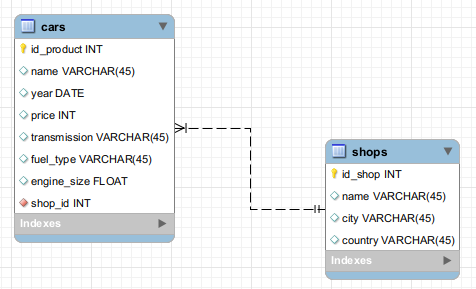

In [2]:
image_url = "S17T02_ex1.png"
display.Image(image_url,height= 400, width = 400)

+ creo una conexio amb la base de dades

In [19]:
mydb = mysql.connector.connect(
    host = 'localhost',    
    user = 'manel',
    password = 'itacademy',
    database="mydb")

print(mydb)

+ creo el objecte mycursor amb el metode cursor() a la meva conexió a la base de dades

In [20]:
mycursor = mydb.cursor()

print(mycursor)

CMySQLCursor: (Nothing executed yet)


+ ara ja puc escriure comandes per interaccionar amb la BBDD

In [21]:
sql_query = 'SHOW TABLES'
mycursor.execute(sql_query)

for x in mycursor:
  print(x) 

('hyundai_cars',)
('shops',)


In [23]:
# executo una comanda de SQL language
sql_query = 'SELECT * FROM shops'
mycursor.execute(sql_query)

In [24]:
# miro tot el que em retorna
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(1, 'cotxes_gaudi', 'Barcelona', 'Spain')
(2, 'lulu_voitures', 'Paris ', 'France')
(3, 'auto_van_gogh', 'Amsterdam', 'Netherlands')
(4, 'picolinos_auto', 'Rome', 'Italy')
(5, 'Bernies_car', 'London', 'UK')
(6, 'wundabar_autos', 'Berlin', 'Germany')


In [25]:
# executo una comanda de SQL language
sql_query = 'SELECT * FROM hyundai_cars LIMIT 10'
mycursor.execute(sql_query)
myresult = mycursor.fetchall()
print(myresult)

[(1, ' I20', 2017, 7999, 'Manual', 'Petrol', 1.2, 1), (2, ' Tucson', 2016, 14499, 'Automatic', 'Diesel', 2.0, 2), (3, ' Tucson', 2016, 11399, 'Manual', 'Diesel', 1.7, 3), (4, ' I10', 2016, 6499, 'Manual', 'Petrol', 1.0, 4), (5, ' IX35', 2015, 10199, 'Manual', 'Diesel', 2.0, 5), (6, ' I10', 2015, 6149, 'Manual', 'Petrol', 1.0, 6), (7, ' I20', 2015, 6799, 'Manual', 'Petrol', 1.2, 1), (8, ' Tucson', 2016, 14199, 'Automatic', 'Diesel', 1.7, 2), (9, ' I30', 2018, 10399, 'Automatic', 'Petrol', 1.4, 3), (10, ' Tucson', 2016, 12163, 'Manual', 'Diesel', 1.7, 4)]


In [26]:
mycursor.execute("DESCRIBE hyundai_cars;")

myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('id-product', b'int', 'YES', '', None, '')
('name', b'text', 'YES', '', None, '')
('year', b'int', 'YES', '', None, '')
('price', b'int', 'YES', '', None, '')
('transmission', b'text', 'YES', '', None, '')
('fuel_type', b'text', 'YES', '', None, '')
('engine_size', b'double', 'YES', '', None, '')
('shop', b'int', 'YES', '', None, '')


### Nivell 2

- Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

+ vaig a provar differents queries

In [89]:
# select specific car name type
sql_query ="SELECT * FROM hyundai_cars WHERE name LIKE '%I2%';"

df = pd.read_sql_query(sql_query,mydb)

df.head()

,id-product,name,year,price,transmission,fuel_type,engine_size,shop
0,1,I20,2017,7999,Manual,Petrol,1.2,1
1,7,I20,2015,6799,Manual,Petrol,1.2,1
2,13,I20,2015,6900,Manual,Petrol,1.2,1
3,22,I20,2015,7995,Manual,Petrol,1.2,4
4,35,I20,2017,11400,Automatic,Petrol,0.0,5


In [57]:
# select the whole table
sql_query = 'SELECT * FROM shops'
pd.read_sql_query(sql_query,mydb)

,id_shop,name,city,country
0,1,cotxes_gaudi,Barcelona,Spain
1,2,lulu_voitures,Paris,France
2,3,auto_van_gogh,Amsterdam,Netherlands
3,4,picolinos_auto,Rome,Italy
4,5,Bernies_car,London,UK
5,6,wundabar_autos,Berlin,Germany


In [62]:
# join both tables and order by YEAR
sql_query = '''SELECT car.name, car.year, car.price, car.transmission,
                shops.name,shops.country FROM hyundai_cars AS car
                INNER JOIN shops
                ON car.shop = shops.id_shop
                ORDER BY car.year ASC;'''


df = pd.read_sql_query(sql_query,mydb)

df.head()

,name,year,price,transmission,name,country
0,IX35,2011,6936,Manual,Bernies_car,UK
1,IX35,2011,7799,Automatic,lulu_voitures,France
2,IX35,2012,5000,Manual,cotxes_gaudi,Spain
3,Veloster,2012,6300,Manual,lulu_voitures,France
4,I10,2012,3799,Manual,Bernies_car,UK


In [95]:
# join tables and count the stock of cars for a given type of car name for each country

sql_query = '''SELECT COUNT(*) AS stock, s.country FROM hyundai_cars AS c
                LEFT JOIN shops AS s
                ON c.shop = s.id_shop
                WHERE c.name = ' Tucson'
                GROUP BY s.country;'''


df = pd.read_sql_query(sql_query,mydb)

df.head()

,stock,country
0,11,France
1,11,Netherlands
2,7,Italy
3,7,UK
4,5,Germany


### Nivell 3
- Exercici 3

Genera algun gràfic que resumeixi les dades. 

In [ ]:
#mycursor.close()